In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv("C:\\Users\\hp\\OneDrive\\Desktop\\book.csv")
df.head()
df.info()
df.describe()

C:\Users\hp\AppData\Local\Temp\ipykernel_19308\137128611.py:5: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:\\Users\\hp\\OneDrive\\Desktop\\book.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271360 non-null  object
 1   Book-Title           271360 non-null  object
 2   Book-Author          271358 non-null  object
 3   Year-Of-Publication  271360 non-null  object
 4   Publisher            271358 non-null  object
 5   Image-URL-S          271360 non-null  object
 6   Image-URL-M          271360 non-null  object
 7   Image-URL-L          271357 non-null  object
dtypes: object(8)
memory usage: 16.6+ MB


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
count,271360,271360,271358,271360,271358,271360,271360,271357
unique,271360,242131,102022,202,16806,271044,271044,271041
top,020130998X,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/155936078X.0...,http://images.amazon.com/images/P/155936078X.0...,http://images.amazon.com/images/P/155936078X.0...
freq,1,27,632,13903,7535,2,2,2


In [5]:
columns_to_show = ['ISBN','Book-Title','Book-Author', 'Year-Of-Publication', 'Publisher']
df[columns_to_show]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271355,440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271356,525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
271358,192126040,Republic (World's Classics),Plato,1996,Oxford University Press


In [19]:
year_counts =df['Year-Of-Publication'].value_counts() 
print(year_counts)



Year-Of-Publication
2002    13903
2001    13715
1999    13414
2000    13373
1998    12116
        ...  
1897        1
2024        1
1376        1
1926        1
2037        1
Name: count, Length: 202, dtype: int64


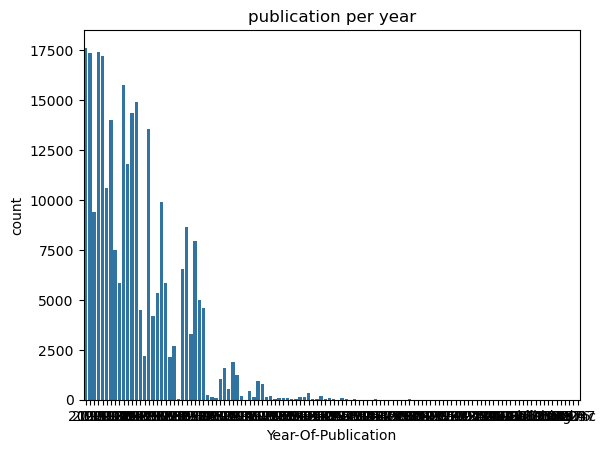

In [10]:
sns.countplot(x='Year-Of-Publication', data=df)
plt.title("publication per year")
plt.show()

In [24]:
year_counts = df['Year-Of-Publication'].value_counts()
print(year_counts.head())

Year-Of-Publication
2002    13903
2001    13715
1999    13414
2000    13373
1998    12116
Name: count, dtype: int64


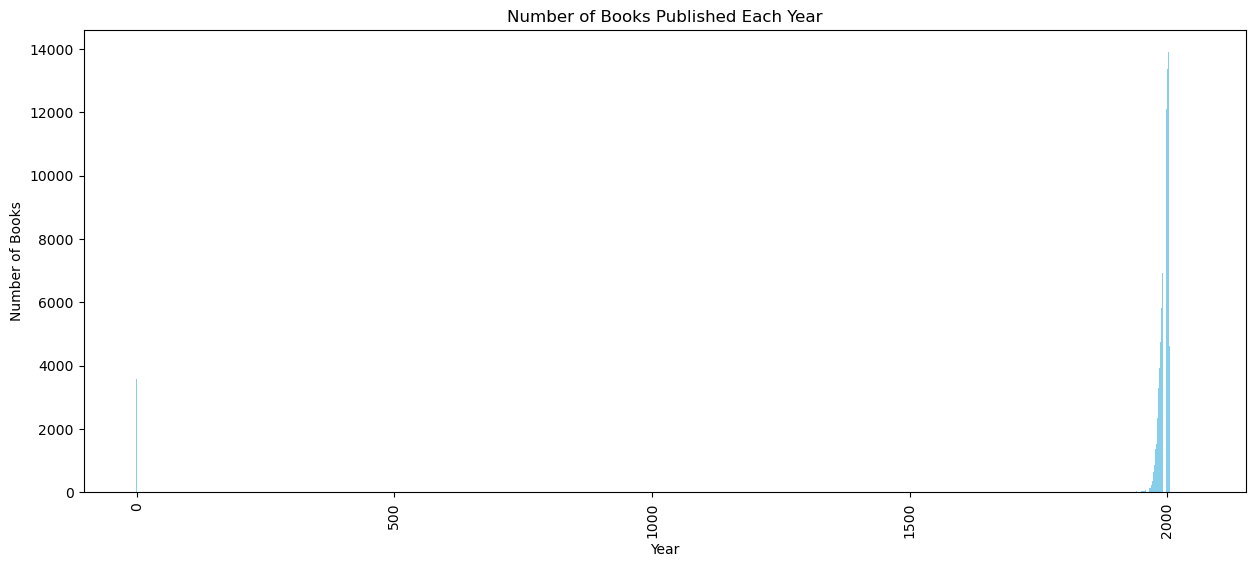

In [30]:
plt.figure(figsize=(15,6))

# Filter out non-numeric values from the index before plotting
# Convert to string first to handle any non-string values
year_counts_filtered = year_counts.copy()
year_counts_filtered.index = year_counts_filtered.index.astype(str)

# Keep only the rows where the index can be converted to a number
numeric_indices = []
numeric_values = []

for idx, value in zip(year_counts_filtered.index, year_counts_filtered.values):
    try:
        numeric_idx = pd.to_numeric(idx)
        numeric_indices.append(numeric_idx)
        numeric_values.append(value)
    except ValueError:
        # Skip non-numeric indices like "DK Publishing Inc"
        continue

plt.bar(numeric_indices, numeric_values, color='skyblue')
plt.title("Number of Books Published Each Year")
plt.xlabel("Year")
plt.ylabel("Number of Books")
plt.xticks(rotation=90)
plt.show()

Top 10 authors by number of books published:
Book-Author
William Shakespeare     496
Agatha Christie         476
Ann M. Martin           395
Carolyn Keene           371
Francine Pascal         349
Stephen King            332
Barbara Cartland        300
Isaac Asimov            286
Not Applicable (Na )    286
R. L. Stine             278
Name: Book-Title, dtype: int64


C:\Users\hp\AppData\Local\Temp\ipykernel_19308\799962507.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=author_book_count.head(10).index, y=author_book_count.head(10).values, palette='cubehelix')


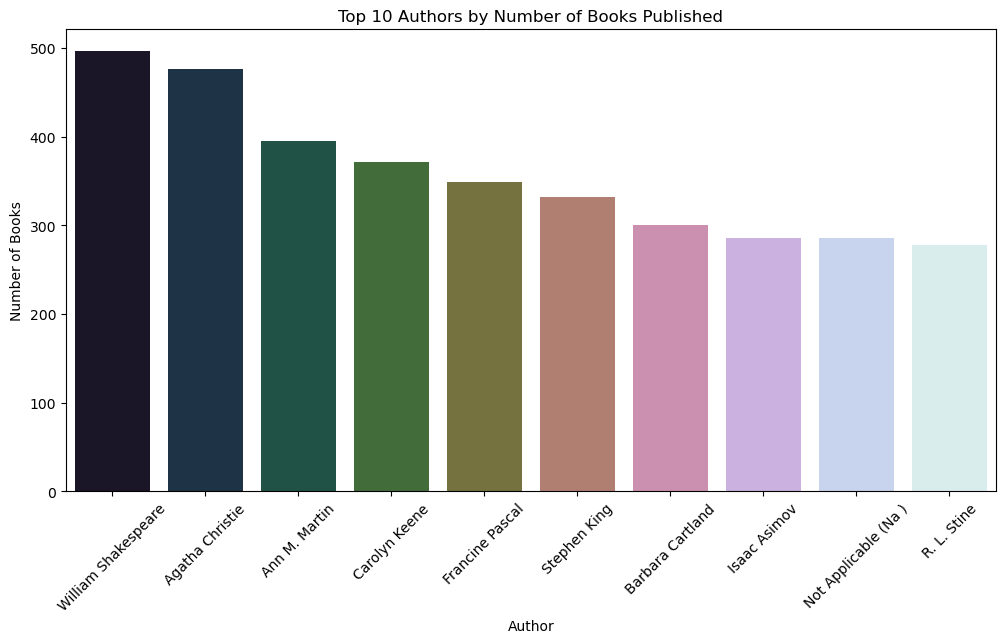

In [36]:
df = df.dropna(subset=['Book-Author', 'Book-Title'])
author_book_count = df.groupby('Book-Author')['Book-Title'].nunique().sort_values(ascending=False)

print("Top 10 authors by number of books published:")
print(author_book_count.head(10))

# --------------------------
# 3️⃣ Plot the top 10 authors
# --------------------------
plt.figure(figsize=(12,6))
sns.barplot(x=author_book_count.head(10).index, y=author_book_count.head(10).values, palette='cubehelix')
plt.xticks(rotation=45)
plt.title("Top 10 Authors by Number of Books Published")
plt.xlabel("Author")
plt.ylabel("Number of Books")
plt.show()

In [38]:
author_year = df.groupby([ 'Book-Author'])['Book-Title'].count().reset_index()
author_year.rename(columns={'Book-Title': 'Books_Published'}, inplace=True)

# Check the data
print(author_year.head())

                        Book-Author  Books_Published
0                          D. Chiel                1
1                      J. D. Landis                1
2                       Mimma Balia                1
3                           'N Sync                1
4  142 moms from all over the world                1


C:\Users\hp\AppData\Local\Temp\ipykernel_16464\299732519.py:11: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("C:\\Users\\hp\\OneDrive\\Desktop\\book.csv")


Top 10 authors by number of books published:
Book-Author
William Shakespeare     496
Agatha Christie         476
Ann M. Martin           395
Carolyn Keene           371
Francine Pascal         349
Stephen King            332
Barbara Cartland        300
Isaac Asimov            286
Not Applicable (Na )    286
R. L. Stine             278
Name: Book-Title, dtype: int64


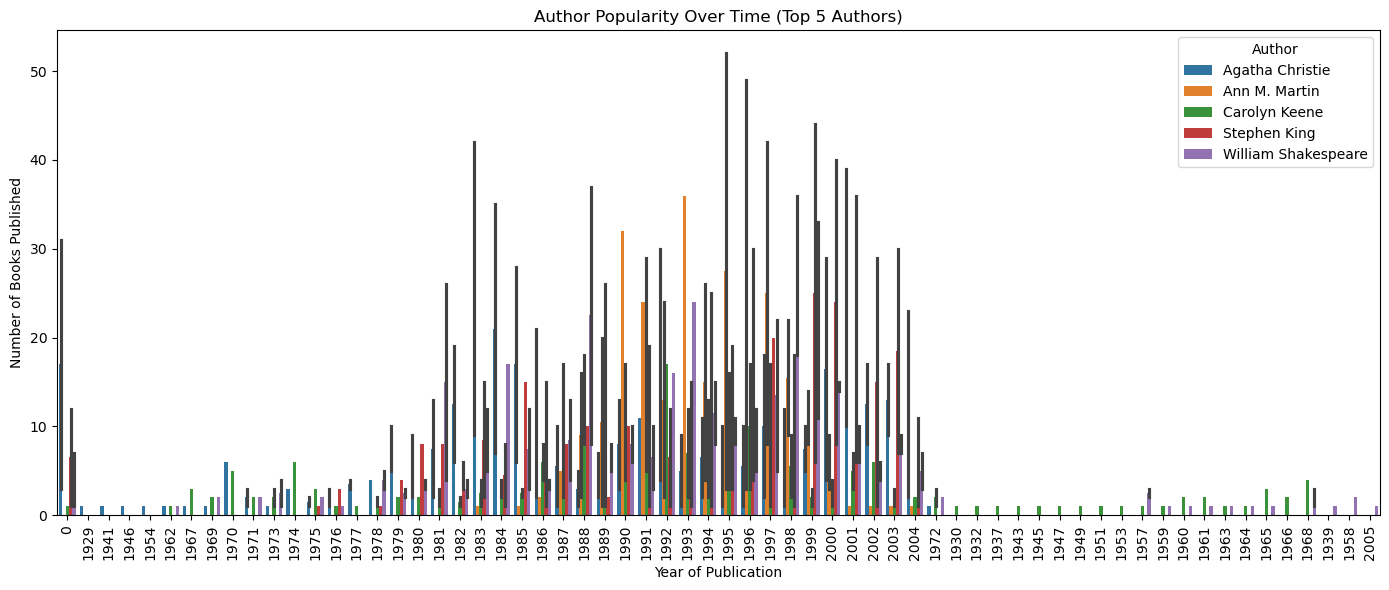

In [11]:
# First, import the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the DataFrame - you need to load your data
# For example:
# df = pd.read_csv('your_data_file.csv')  # Replace with your actual data source

# Assuming you have a CSV file with book data
df = pd.read_csv("C:\\Users\\hp\\OneDrive\\Desktop\\book.csv") 
df = df.dropna(subset=['Book-Author', 'Book-Title'])
author_book_count = df.groupby('Book-Author')['Book-Title'].nunique().sort_values(ascending=False)

print("Top 10 authors by number of books published:")
print(author_book_count.head(10))

# Filter dataset for top authors
author_year_top = author_year[author_year['Book-Author'].isin(top_authors)]

# Plot using Seaborn
plt.figure(figsize=(14,6))
sns.barplot(data=author_year_top, 
             x='Year-Of-Publication',
             y='Books_Published', 
             hue='Book-Author')
plt.title("Author Popularity Over Time (Top 5 Authors)")
plt.xlabel("Year of Publication")
plt.ylabel("Number of Books Published")
plt.legend(title='Author')
plt.xticks(rotation=90) 
plt.tight_layout() 
plt.show()